In [63]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widg
import copy

In [64]:
Number_of_Data_Sets = 7
Truss_Level = 101
a=[0]*Number_of_Data_Sets

for i in range(1,Number_of_Data_Sets+1):
    Data_Set = i
    df = pd.read_csv('C:\\Users\\Reily\\Desktop\\Beeyond Data\\data_set_'+str(Data_Set)+'.csv')
    df = df.fillna(0)
    df.columns = [c.replace(' ', '_') for c in df.columns]

    #make a unrefrenced copy of our data frame
    df1 = copy.deepcopy(df)

    #reduce data by truss level
    df2 = df1.loc[(df1.Truss == Truss_Level)]

    #group data by device
    dfGroupByDevice = df2.groupby(df2.Device).sum()

    #normalize the setting flowers per device based on total flowers per device

    dfGroupByDevice.Setting = dfGroupByDevice.Setting.div(dfGroupByDevice.Total_flowers)
    dfGroupByDevice.Setting = 100*dfGroupByDevice.Setting

    #making data frame of device and percent setting
    dfGroupByDevice = dfGroupByDevice[['Setting']]
    dfGroupByDevice
    dfGroupByDevice.columns = ['% Setting Day ' + str(i)] 
    a[i-1]= dfGroupByDevice
    
bigFrame = pd.concat(a, axis=1)
bigFrame



% Setting Day 1  % Setting Day 2  % Setting Day 3  % Setting Day 4  \
Device                                                                       
A                     0                0                0         4.060914   
B                     0                0                0         3.743316   
C                     0                0                0         2.790698   
E                     0                0                0         0.000000   
F                     0                0                0         3.243243   

        % Setting Day 5  % Setting Day 6  % Setting Day 7  
Device                                                     
A             17.766497        20.370370        31.400966  
B             16.384181        23.529412        33.516484  
C             20.642202        23.684211        37.719298  
E              5.691057         7.438017        10.655738  
F             18.461538        26.470588        31.914894

<function __main__.plotData>

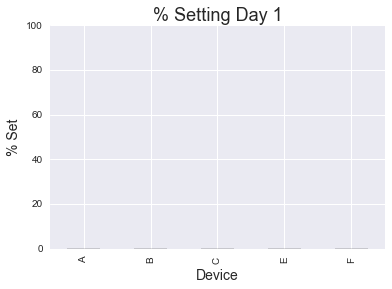

In [65]:
def plotData(day):
    plt.xlabel('Treatment', fontsize = 14)
    plt.ylabel('% Set', fontsize = 14)
    plt.title('% Setting Day ' + str(int (day)),fontsize = 18)
    plt.grid(False)
    plt.ylim([0,100])
    bigFrame['% Setting Day ' + str(int (day))].plot(kind='bar',)

timeSlider = widg.FloatSlider(description='Time', min=1, max=Number_of_Data_Sets, step=1)

widg.interact(plotData,
            day=timeSlider)

In [66]:
a1=[0]*(Number_of_Data_Sets-1)
#make a shifted data frame of the previous data
shiftedBigFrame = bigFrame.shift(periods=-1,axis=1).fillna(0)
#subtract the big frame from the shifted
deltaBigFrame=shiftedBigFrame.subtract(bigFrame)

#delet last colomn because it will go negitive
del deltaBigFrame['% Setting Day ' + str(Number_of_Data_Sets)]

#rename headers
for i in range(1,Number_of_Data_Sets):
    deltaBigFrame.rename(columns={'% Setting Day ' + str(i):'% Delta Setting Day ' + str(i)+' & '+str(i+1)}, inplace=True)
    
deltaBigFrame

% Delta Setting Day 1 & 2  % Delta Setting Day 2 & 3  \
Device                                                         
A                               0                          0   
B                               0                          0   
C                               0                          0   
E                               0                          0   
F                               0                          0   

        % Delta Setting Day 3 & 4  % Delta Setting Day 4 & 5  \
Device                                                         
A                        4.060914                  13.705584   
B                        3.743316                  12.640865   
C                        2.790698                  17.851504   
E                        0.000000                   5.691057   
F                        3.243243                  15.218295   

        % Delta Setting Day 5 & 6  % Delta Setting Day 6 & 7  
Device                                                        
A                        2.603873                  11.030596  
B                        7.145231                   9.987072  
C                        3.042009                  14.035088  
E                        1.746960                   3.217721  
F                        8.009050                   5.444305